In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [90]:
base_path = 'dataset_nyc_taxi_samples/parquet/'

In [134]:
green_df = pd.read_parquet(base_path + 'green_train_1M.parquet')

green_df['trip_time'] = green_df['lpep_dropoff_datetime'] - green_df['lpep_pickup_datetime']
green_df['trip_time'] = green_df['trip_time'].values.astype(float)//10**9

important_cols = ['trip_time', 'trip_distance', 'tip_amount', 'fare_amount']

for col in important_cols:
    green_df = green_df[green_df[col] >= 0]
    
green_df.dropna(subset=important_cols, inplace=True)

green_df[important_cols]

,trip_time,trip_distance,tip_amount,fare_amount
0,2120.0,6.74,0.00,27.00
1,3052.0,17.61,0.00,51.58
2,332.0,0.88,0.00,6.00
3,2000.0,4.59,5.01,21.50
4,570.0,1.36,1.76,8.00
...,...,...,...,...
999965,931.0,2.60,2.50,17.00
999966,1014.0,2.50,3.56,17.00
999967,1643.0,9.18,0.00,40.10
999968,945.0,2.30,4.11,16.30


In [135]:
numerator_columns = ['tip_amount', 'fare_amount']
denominator_columns = ['trip_time', 'trip_distance']
new_cols = []

for d_c in denominator_columns:
    green_df = green_df[green_df[d_c] > 0]

for n_c in numerator_columns:
    for d_c in denominator_columns:
        col_name = f"{n_c}_per_{d_c}"
        green_df[col_name] = green_df[n_c]/green_df[d_c]
        new_cols.append(col_name)

green_df[new_cols]     

,tip_amount_per_trip_time,tip_amount_per_trip_distance,fare_amount_per_trip_time,fare_amount_per_trip_distance
0,0.000000,0.000000,0.012736,4.005935
1,0.000000,0.000000,0.016900,2.929018
2,0.000000,0.000000,0.018072,6.818182
3,0.002505,1.091503,0.010750,4.684096
4,0.003088,1.294118,0.014035,5.882353
...,...,...,...,...
999965,0.002685,0.961538,0.018260,6.538462
999966,0.003511,1.424000,0.016765,6.800000
999967,0.000000,0.000000,0.024407,4.368192
999968,0.004349,1.786957,0.017249,7.086957


In [136]:
green_df[new_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 954528 entries, 0 to 999969
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   tip_amount_per_trip_time       954528 non-null  float64
 1   tip_amount_per_trip_distance   954528 non-null  float64
 2   fare_amount_per_trip_time      954528 non-null  float64
 3   fare_amount_per_trip_distance  954528 non-null  float64
dtypes: float64(4)
memory usage: 36.4 MB


In [137]:
months_in_years = {
    2019 : range(1, 12),
    2020 : range(12),
    2021 : range(12),
    2022 : range(12),
    2023 : range(12),
}

results = {}

date_column = 'lpep_pickup_datetime'
selected_columns = new_cols + [date_column]
df = green_df[selected_columns].dropna()

for year in months_in_years.keys():
    for month in months_in_years[year]:
        month_idx = month+1
        month_df = df[(df[date_column].dt.year == year) & (df[date_column].dt.month == month_idx)]
        results[f"{month_idx}_{year}"] = month_df[new_cols].mean()

In [138]:
green_results_df = pd.DataFrame(results).T
green_results_df.head()

,tip_amount_per_trip_time,tip_amount_per_trip_distance,fare_amount_per_trip_time,fare_amount_per_trip_distance
2_2019,0.002781,0.799250,0.022676,6.541361
3_2019,0.003246,0.931706,0.024578,7.337039
4_2019,0.003801,0.989896,0.026842,6.859457
5_2019,0.004410,1.080570,0.026935,6.736207
6_2019,0.004479,1.054035,0.031858,6.564565


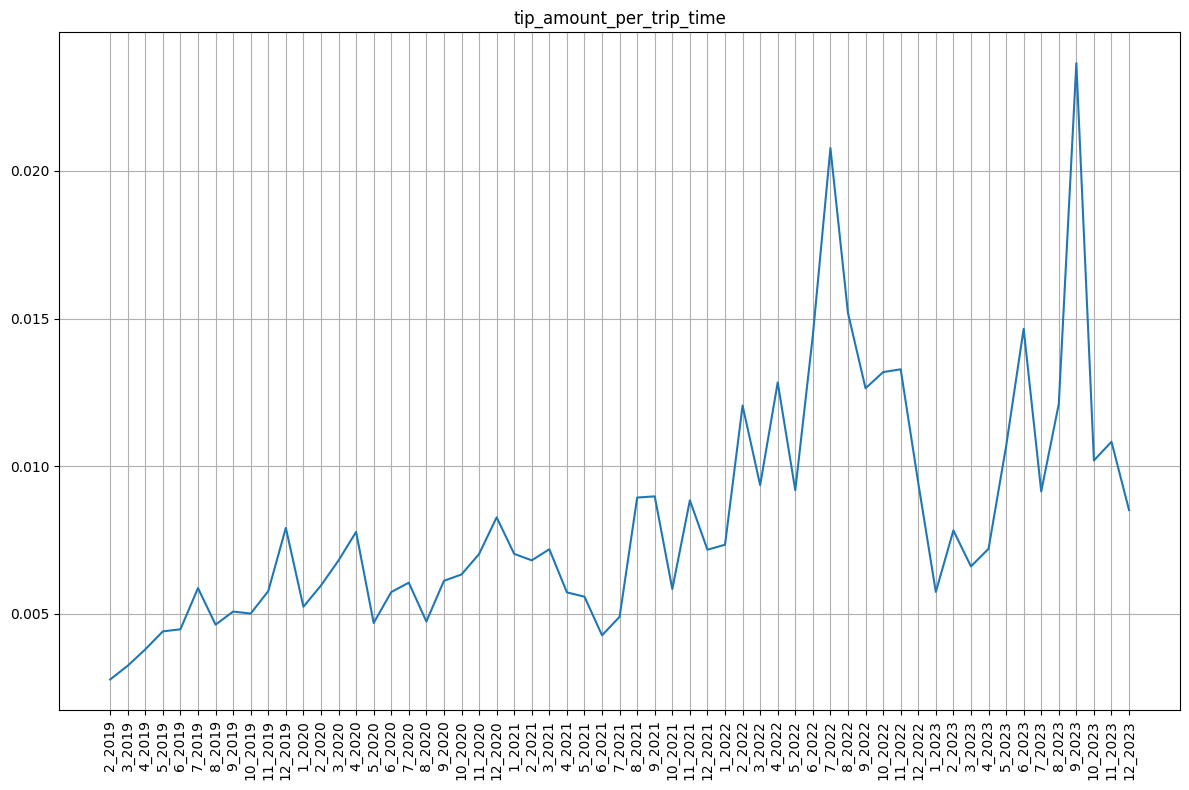

In [113]:
plt.figure(figsize=(12, 8))
plt.plot(green_results_df['tip_amount_per_trip_time'])
plt.title('tip_amount_per_trip_time')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

In [114]:
yellow_df = pd.read_parquet(base_path + 'yellow_train_1M.parquet')

yellow_df['trip_time'] = yellow_df['tpep_dropoff_datetime'] - yellow_df['tpep_pickup_datetime']
yellow_df['trip_time'] = yellow_df['trip_time'].values.astype(float)//10**9

important_cols = ['trip_time', 'trip_distance', 'tip_amount', 'fare_amount']

for col in important_cols:
    yellow_df = yellow_df[yellow_df[col] >= 0]
    
yellow_df.dropna(subset=important_cols, inplace=True)

yellow_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,apparent_temperature (°C),precipitation (mm),rain (mm),snowfall (cm),snow_depth (m),surface_pressure (hPa),cloud_cover (%),wind_speed_10m (km/h),is_day (),trip_time
0,1,2019-02-15 12:27:24,2019-02-15 12:31:48,1.0,0.50,1.0,N,229,237,1,...,7.1,0.0,0.0,0.0,0.01,1001.1,56,19.5,1,264.0
1,2,2019-02-22 17:52:12,2019-02-22 18:04:09,1.0,1.25,1.0,N,142,230,1,...,1.2,0.0,0.0,0.0,0.02,1022.4,30,10.2,1,717.0
2,1,2019-02-25 02:33:32,2019-02-25 02:47:11,1.0,3.60,1.0,N,186,236,1,...,-4.8,0.0,0.0,0.0,0.00,994.8,100,33.3,0,819.0
3,2,2019-02-03 19:43:24,2019-02-03 19:52:12,2.0,1.68,1.0,N,141,161,1,...,-2.9,0.0,0.0,0.0,0.00,1013.2,10,8.6,0,528.0
4,2,2019-02-22 08:55:42,2019-02-22 08:58:11,1.0,0.48,1.0,N,236,236,1,...,-2.0,0.0,0.0,0.0,0.03,1020.4,30,11.4,1,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999964,2,2023-12-29 11:20:52,2023-12-29 11:28:01,1.0,0.61,1.0,N,237,236,1,...,8.5,0.0,0.0,0.0,0.00,999.3,31,10.2,1,429.0
999965,1,2023-12-17 00:03:34,2023-12-17 00:48:38,1.0,6.20,1.0,N,234,17,1,...,2.3,0.0,0.0,0.0,0.00,1026.4,49,8.6,0,2704.0
999966,1,2023-12-08 20:45:18,2023-12-08 21:11:40,0.0,4.90,1.0,N,114,263,1,...,1.4,0.0,0.0,0.0,0.00,1017.0,1,9.5,0,1582.0
999967,2,2023-12-08 20:41:22,2023-12-08 20:55:09,1.0,1.41,1.0,N,237,229,1,...,1.4,0.0,0.0,0.0,0.00,1017.0,1,9.5,0,827.0


In [115]:
yellow_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'retail_price',
       'temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)',
       'apparent_temperature (°C)', 'precipitation (mm)', 'rain (mm)',
       'snowfall (cm)', 'snow_depth (m)', 'surface_pressure (hPa)',
       'cloud_cover (%)', 'wind_speed_10m (km/h)', 'is_day ()', 'trip_time'],
      dtype='object')

In [117]:
numerator_columns = ['tip_amount', 'fare_amount']
denominator_columns = ['trip_time', 'trip_distance']
new_cols = []

for d_c in denominator_columns:
    yellow_df = yellow_df[yellow_df[d_c] > 0]

for n_c in numerator_columns:
    for d_c in denominator_columns:
        col_name = f"{n_c}_per_{d_c}"
        yellow_df[col_name] = yellow_df[n_c]/yellow_df[d_c]
        new_cols.append(col_name)

yellow_df[new_cols]  

,tip_amount_per_trip_time,tip_amount_per_trip_distance,fare_amount_per_trip_time,fare_amount_per_trip_distance
0,0.005871,3.100000,0.017045,9.000000
1,0.003710,2.128000,0.012552,7.200000
2,0.003663,0.833333,0.016484,3.750000
3,0.004470,1.404762,0.016098,5.059524
4,0.009799,3.041667,0.026846,8.333333
...,...,...,...,...
999964,0.004149,2.918033,0.018415,12.950820
999965,0.004623,2.016129,0.013536,5.903226
999966,0.003666,1.183673,0.015171,4.897959
999967,0.003023,1.773050,0.016324,9.574468


In [118]:
results = {}

date_column = 'tpep_dropoff_datetime'
selected_columns = new_cols + [date_column]
df = yellow_df[selected_columns].dropna()

for year in months_in_years.keys():
    for month in months_in_years[year]:
        month_idx = month+1
        month_df = df[(df[date_column].dt.year == year) & (df[date_column].dt.month == month_idx)]
        results[f"{month_idx}_{year}"] = month_df[new_cols].mean()

In [122]:
yellow_results_df = pd.DataFrame(results).T
yellow_results_df.head()

,tip_amount_per_trip_time,tip_amount_per_trip_distance,fare_amount_per_trip_time,fare_amount_per_trip_distance
2_2019,0.005605,1.688953,0.026482,7.633532
3_2019,0.005282,1.735337,0.023070,6.655496
4_2019,0.005156,1.787631,0.022069,7.558743
5_2019,0.006433,1.891962,0.023890,7.325479
6_2019,0.007259,1.823039,0.030786,7.360616


In [177]:
fhv_df = pd.read_parquet(base_path + 'fhv_train_1M.parquet')

fhv_df['trip_time'] = fhv_df['dropoff_datetime'] - fhv_df['pickup_datetime']
fhv_df['trip_time'] = fhv_df['trip_time'].values.astype(float)//10**9

fhv_df['wait_time'] = fhv_df['pickup_datetime'] - fhv_df['request_datetime']
fhv_df['wait_time'] = fhv_df['wait_time'].values.astype(float)//10**9

fhv_df['total_work_time'] = fhv_df['dropoff_datetime'] - fhv_df['request_datetime']
fhv_df['total_work_time'] = fhv_df['total_work_time'].values.astype(float)//10**9


important_cols = ['trip_time', 'wait_time', 'total_work_time', 'trip_miles', 'tips', 'base_passenger_fare']

for col in important_cols:
    fhv_df = fhv_df[fhv_df[col] >= 0]
    
fhv_df.dropna(subset=important_cols, inplace=True)

fhv_df

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,precipitation (mm),rain (mm),snowfall (cm),snow_depth (m),surface_pressure (hPa),cloud_cover (%),wind_speed_10m (km/h),is_day (),wait_time,total_work_time
0,HV0003,B02764,B02764,2019-02-09 08:01:12,2019-02-09 08:06:35,2019-02-09 08:08:19,2019-02-09 08:38:14,37,62,4.76,...,0.0,0.0,0.0,0.00,1027.0,10,20.7,1,427.0,2222.0
1,HV0003,B02866,B02866,2019-02-26 21:59:29,2019-02-26 22:05:24,2019-02-26 22:06:47,2019-02-26 22:19:38,113,4,1.41,...,0.0,0.0,0.0,0.00,1024.4,18,14.8,0,438.0,1209.0
2,HV0003,B02866,B02866,2019-02-08 09:05:02,2019-02-08 09:05:37,2019-02-08 09:12:58,2019-02-08 09:34:44,170,114,2.64,...,1.7,1.7,0.0,0.00,1006.7,91,11.9,1,476.0,1782.0
3,HV0003,B02875,B02875,2019-02-03 23:04:43,2019-02-03 23:09:40,2019-02-03 23:11:21,2019-02-03 23:31:54,164,79,3.63,...,0.0,0.0,0.0,0.00,1013.7,1,8.9,0,398.0,1631.0
4,HV0002,B02914,B02914,2019-02-22 23:08:37,NaT,2019-02-22 23:15:33,2019-02-22 23:20:42,210,123,1.45,...,0.0,0.0,0.0,0.02,1024.5,30,8.9,0,416.0,725.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999962,HV0005,B03406,None,2023-12-17 00:28:42,NaT,2023-12-17 00:37:24,2023-12-17 00:52:31,262,143,3.36,...,0.0,0.0,0.0,0.00,1025.8,69,8.6,0,522.0,1429.0
999963,HV0003,B03404,B03404,2023-12-10 20:51:14,2023-12-10 20:55:14,2023-12-10 20:55:16,2023-12-10 21:17:45,223,256,8.68,...,3.0,3.0,0.0,0.00,998.6,100,29.2,0,242.0,1591.0
999964,HV0003,B03404,B03404,2023-12-24 15:11:24,2023-12-24 15:15:22,2023-12-24 15:15:27,2023-12-24 15:30:43,226,56,4.96,...,0.0,0.0,0.0,0.00,1022.5,66,4.4,1,243.0,1159.0
999965,HV0003,B03404,B03404,2023-12-08 22:24:13,2023-12-08 22:25:49,2023-12-08 22:26:04,2023-12-08 22:31:51,220,220,0.95,...,0.0,0.0,0.0,0.00,1017.2,13,8.4,0,111.0,458.0


In [125]:
fhv_df.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag', 'retail_price',
       'temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)',
       'apparent_temperature (°C)', 'precipitation (mm)', 'rain (mm)',
       'snowfall (cm)', 'snow_depth (m)', 'surface_pressure (hPa)',
       'cloud_cover (%)', 'wind_speed_10m (km/h)', 'is_day ()', 'wait_time',
       'total_work_time'],
      dtype='object')

In [126]:
fhv_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 993116 entries, 0 to 999966
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   hvfhs_license_num          993116 non-null  object        
 1   dispatching_base_num       993110 non-null  object        
 2   originating_base_num       720143 non-null  object        
 3   request_datetime           993116 non-null  datetime64[ns]
 4   on_scene_datetime          716657 non-null  datetime64[ns]
 5   pickup_datetime            993116 non-null  datetime64[ns]
 6   dropoff_datetime           993116 non-null  datetime64[ns]
 7   PULocationID               993116 non-null  int64         
 8   DOLocationID               993116 non-null  int64         
 9   trip_miles                 993116 non-null  float64       
 10  trip_time                  993116 non-null  float64       
 11  base_passenger_fare        993116 non-null  float64 

In [178]:
numerator_columns = ['tips', 'base_passenger_fare']
denominator_columns = ['trip_time', 'total_work_time', 'trip_miles']
new_cols = []

for d_c in denominator_columns:
    fhv_df = fhv_df[fhv_df[d_c] > 0]

for n_c in numerator_columns:
    for d_c in denominator_columns:
        col_name = f"{n_c}_per_{d_c}"
        fhv_df[col_name] = fhv_df[n_c]/fhv_df[d_c]
        new_cols.append(col_name)

fhv_df[new_cols]  

,tips_per_trip_time,tips_per_total_work_time,tips_per_trip_miles,base_passenger_fare_per_trip_time,base_passenger_fare_per_total_work_time,base_passenger_fare_per_trip_miles
0,0.0,0.0,0.0,0.003042,0.002457,1.147059
1,0.0,0.0,0.0,0.006809,0.004342,3.723404
2,0.0,0.0,0.0,0.014640,0.010730,7.242424
3,0.0,0.0,0.0,0.003852,0.002912,1.308540
4,0.0,0.0,0.0,0.018317,0.007807,3.903448
...,...,...,...,...,...,...
999962,0.0,0.0,0.0,0.022701,0.014409,6.127976
999963,0.0,0.0,0.0,0.018554,0.015732,2.883641
999964,0.0,0.0,0.0,0.021452,0.016954,3.961694
999965,0.0,0.0,0.0,0.022795,0.017271,8.326316


In [179]:
results = {}

date_column = 'request_datetime'
selected_columns = new_cols + [date_column]
df = fhv_df[selected_columns].dropna()

for year in months_in_years.keys():
    for month in months_in_years[year]:
        month_idx = month+1
        month_df = df[(df[date_column].dt.year == year) & (df[date_column].dt.month == month_idx)]
        results[f"{month_idx}_{year}"] = month_df[new_cols].mean()

In [180]:
fhv_results_df = pd.DataFrame(results).T
fhv_results_df.head()

,tips_per_trip_time,tips_per_total_work_time,tips_per_trip_miles,base_passenger_fare_per_trip_time,base_passenger_fare_per_total_work_time,base_passenger_fare_per_trip_miles
2_2019,0.000443,0.000331,0.140539,0.014653,0.010848,4.624850
3_2019,0.000446,0.000331,0.142374,0.013996,0.010297,4.416430
4_2019,0.000445,0.000337,0.146031,0.014626,0.010912,4.779878
5_2019,0.000500,0.000374,0.201644,0.015654,0.011494,5.109527
6_2019,0.000531,0.000405,0.174528,0.016748,0.012127,5.495059


In [181]:
green_results_df.columns

Index(['tip_amount_per_trip_time', 'tip_amount_per_trip_distance',
       'fare_amount_per_trip_time', 'fare_amount_per_trip_distance'],
      dtype='object')

In [182]:
yellow_results_df.columns

Index(['tip_amount_per_trip_time', 'tip_amount_per_trip_distance',
       'fare_amount_per_trip_time', 'fare_amount_per_trip_distance'],
      dtype='object')

In [183]:
fhv_results_df.columns

Index(['tips_per_trip_time', 'tips_per_total_work_time', 'tips_per_trip_miles',
       'base_passenger_fare_per_trip_time',
       'base_passenger_fare_per_total_work_time',
       'base_passenger_fare_per_trip_miles'],
      dtype='object')

In [168]:
tips_per_trip_time = pd.DataFrame([green_results_df['tip_amount_per_trip_time'] * 3600,
                                  yellow_results_df['tip_amount_per_trip_time'] * 3600,
                                  fhv_results_df['tips_per_trip_time'] * 3600]).T

tips_per_trip_time.columns = ['green', 'yellow', 'fhv']
tips_per_trip_time.head()

,green,yellow,fhv
2_2019,10.013139,20.178314,1.587957
3_2019,11.687179,19.016143,1.602528
4_2019,13.682633,18.560515,1.598151
5_2019,15.875688,23.158700,1.797516
6_2019,16.125972,26.132294,1.906496


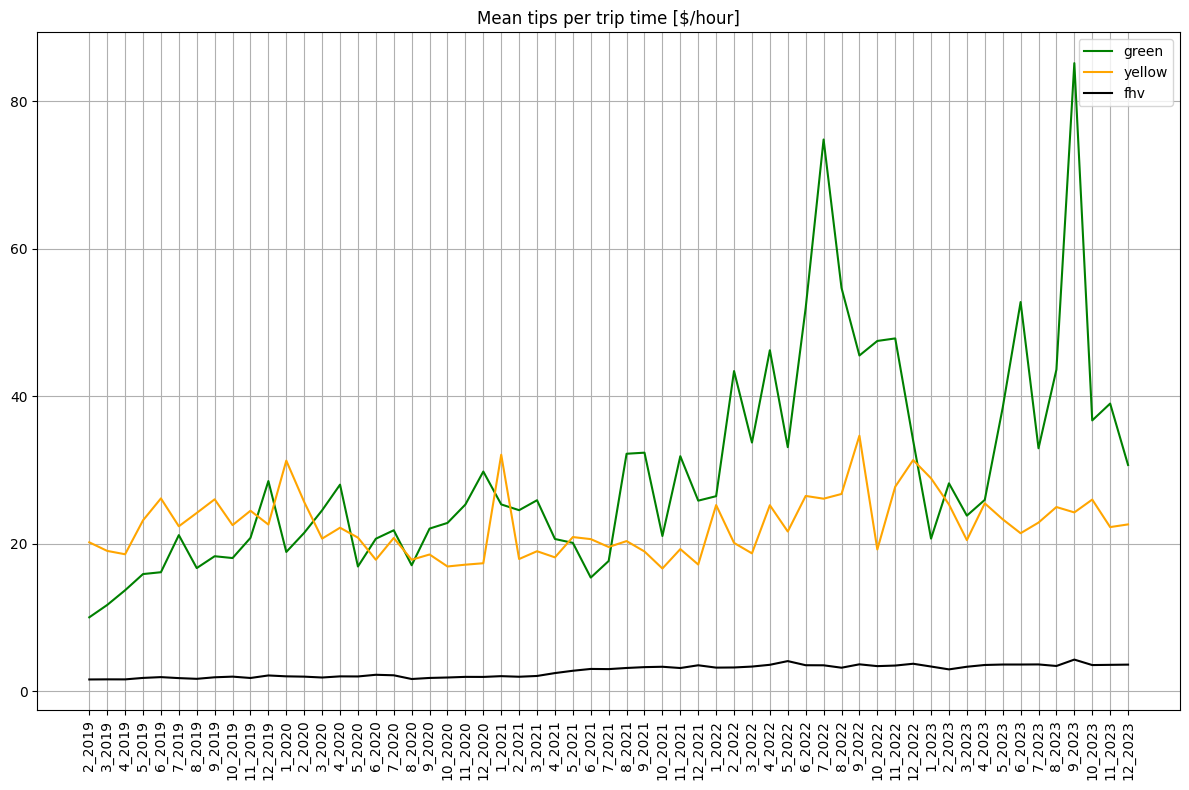

In [165]:
df = tips_per_trip_time
plt.figure(figsize=(12, 8))
plt.plot(df.index, df['green'], label='green', color='green')
plt.plot(df.index, df['yellow'], label='yellow', color='orange')
plt.plot(df.index, df['fhv'], label='fhv', color='black')
plt.title('Mean tips per trip time [$/hour]')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [166]:
tips_per_distance = pd.DataFrame([green_results_df['tip_amount_per_trip_distance'],
                                  yellow_results_df['tip_amount_per_trip_distance'],
                                  fhv_results_df['tips_per_trip_miles']]).T

tips_per_distance.columns = ['green', 'yellow', 'fhv']

tips_per_distance.head()

,green,yellow,fhv
2_2019,0.799250,1.688953,0.140042
3_2019,0.931706,1.735337,0.142119
4_2019,0.989896,1.787631,0.145701
5_2019,1.080570,1.891962,0.201242
6_2019,1.054035,1.823039,0.174187


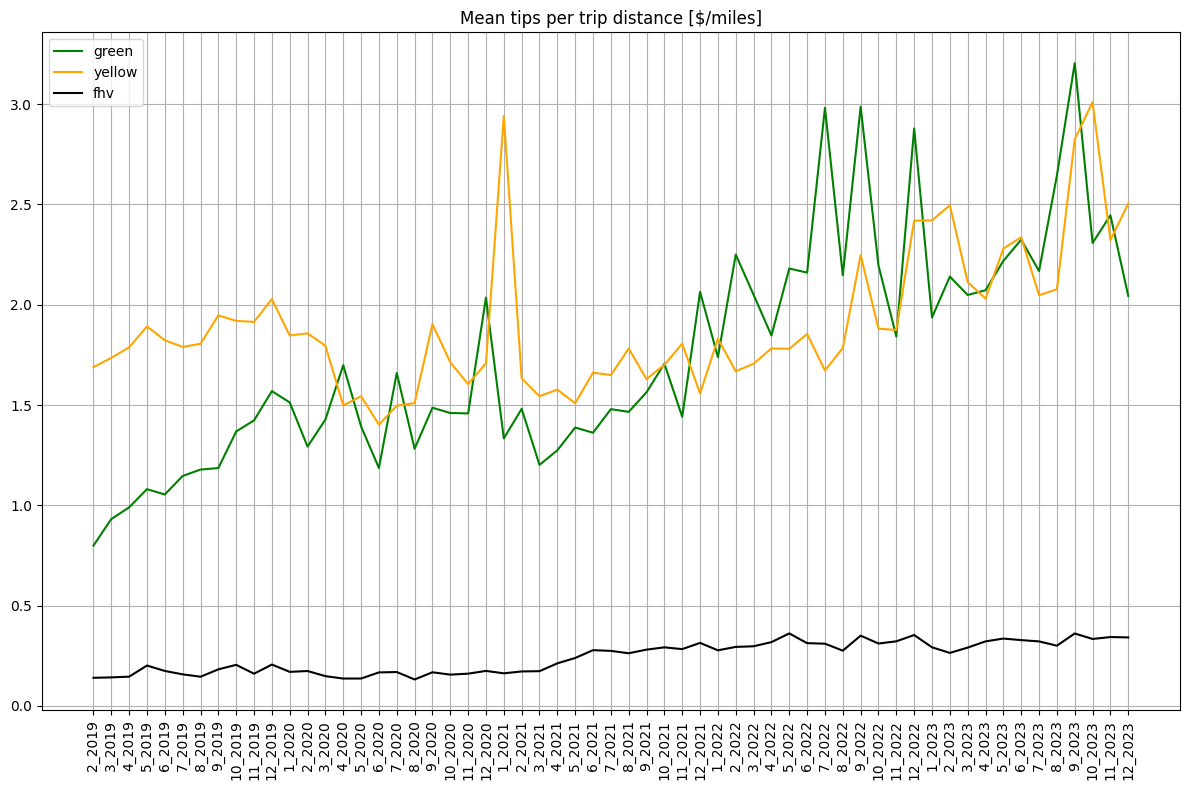

In [189]:
df = tips_per_distance
plt.figure(figsize=(12, 8))
plt.plot(df.index, df['green'], label='green', color='green')
plt.plot(df.index, df['yellow'], label='yellow', color='orange')
plt.plot(df.index, df['fhv'], label='fhv', color='black')
plt.title('Mean tips per trip distance [$/miles]')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [184]:
fare_per_trip_time = pd.DataFrame([green_results_df['fare_amount_per_trip_time'] * 3600,
                                  yellow_results_df['fare_amount_per_trip_time'] * 3600,
                                  fhv_results_df['base_passenger_fare_per_trip_time'] * 3600]).T

fare_per_trip_time.columns = ['green', 'yellow', 'fhv']
fare_per_trip_time.head()

,green,yellow,fhv
2_2019,81.632391,95.334758,52.752584
3_2019,88.481598,83.053534,50.385678
4_2019,96.629822,79.447411,52.654609
5_2019,96.966529,86.005051,56.355265
6_2019,114.688781,110.828460,60.291865


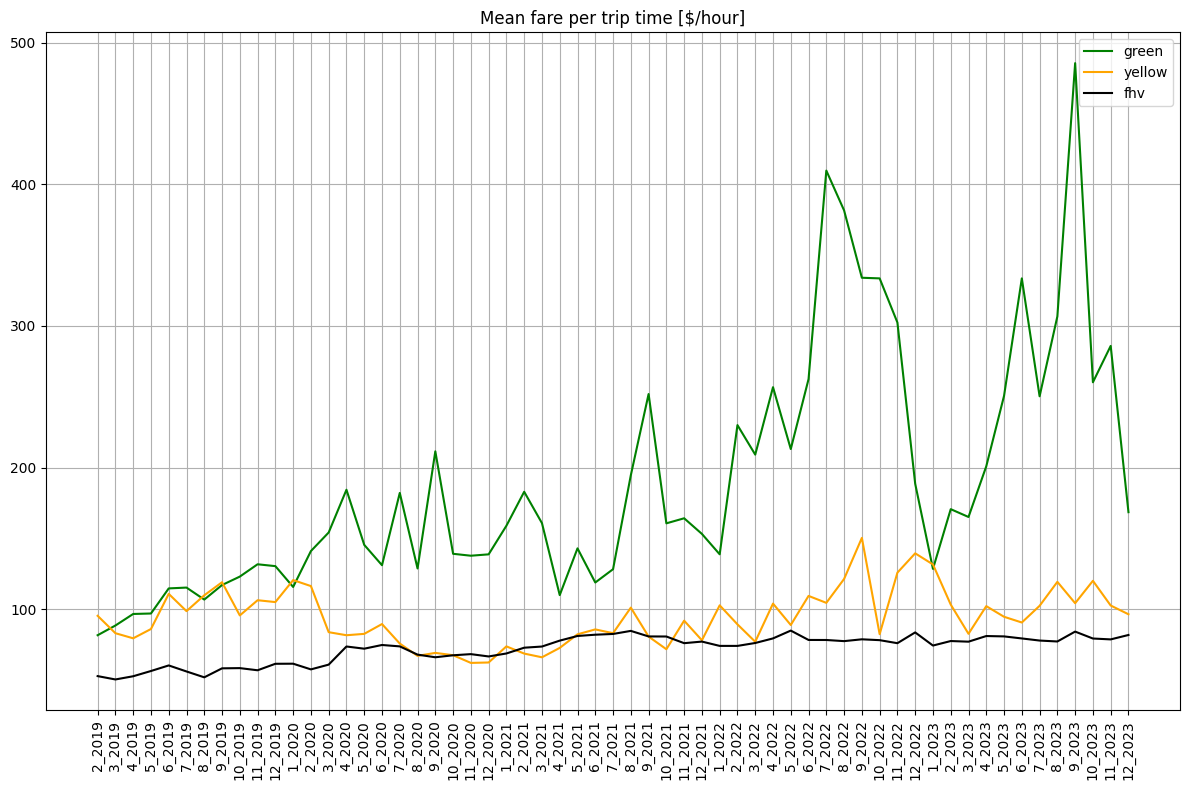

In [185]:
df = fare_per_trip_time
plt.figure(figsize=(12, 8))
plt.plot(df.index, df['green'], label='green', color='green')
plt.plot(df.index, df['yellow'], label='yellow', color='orange')
plt.plot(df.index, df['fhv'], label='fhv', color='black')
plt.title('Mean fare per trip time [$/hour]')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [186]:
fare_per_distance = pd.DataFrame([green_results_df['fare_amount_per_trip_distance'],
                                  yellow_results_df['fare_amount_per_trip_distance'],
                                  fhv_results_df['base_passenger_fare_per_trip_miles']]).T

fare_per_distance.columns = ['green', 'yellow', 'fhv']

fare_per_distance.head()

,green,yellow,fhv
2_2019,6.541361,7.633532,4.624850
3_2019,7.337039,6.655496,4.416430
4_2019,6.859457,7.558743,4.779878
5_2019,6.736207,7.325479,5.109527
6_2019,6.564565,7.360616,5.495059


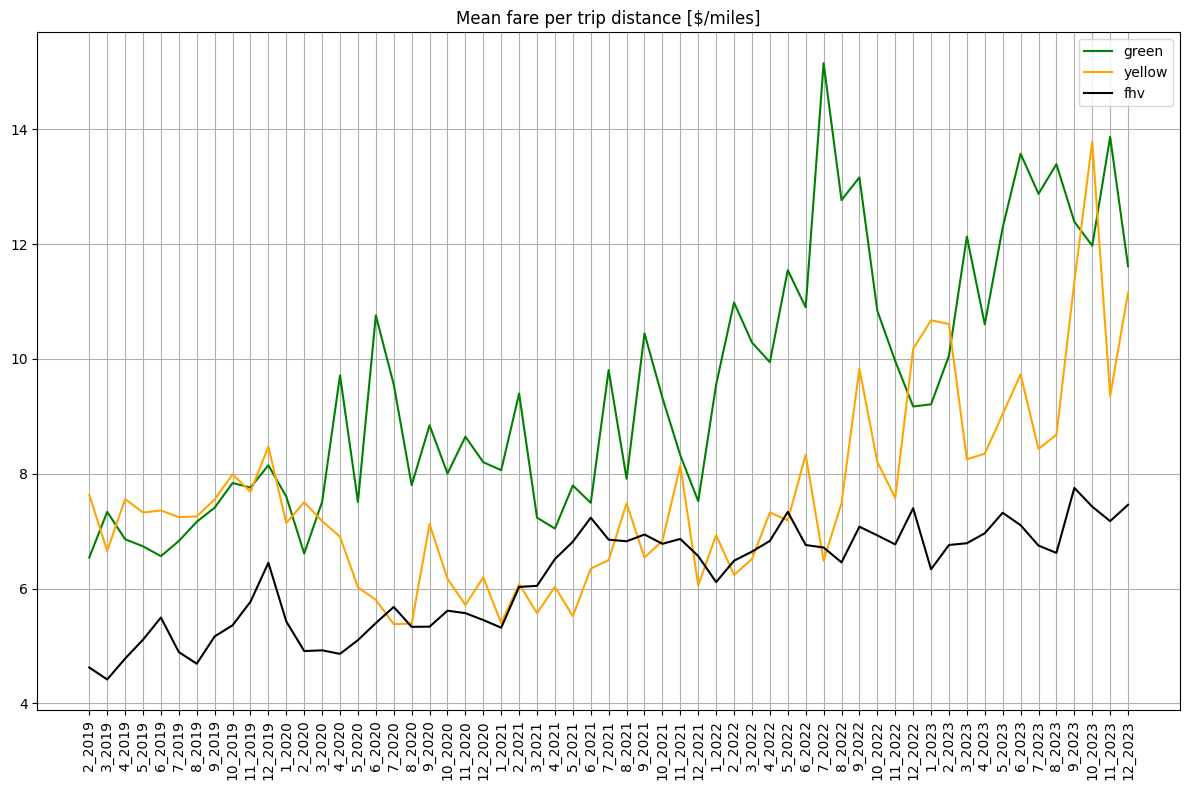

In [188]:
df = fare_per_distance
plt.figure(figsize=(12, 8))
plt.plot(df.index, df['green'], label='green', color='green')
plt.plot(df.index, df['yellow'], label='yellow', color='orange')
plt.plot(df.index, df['fhv'], label='fhv', color='black')
plt.title('Mean fare per trip distance [$/miles]')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

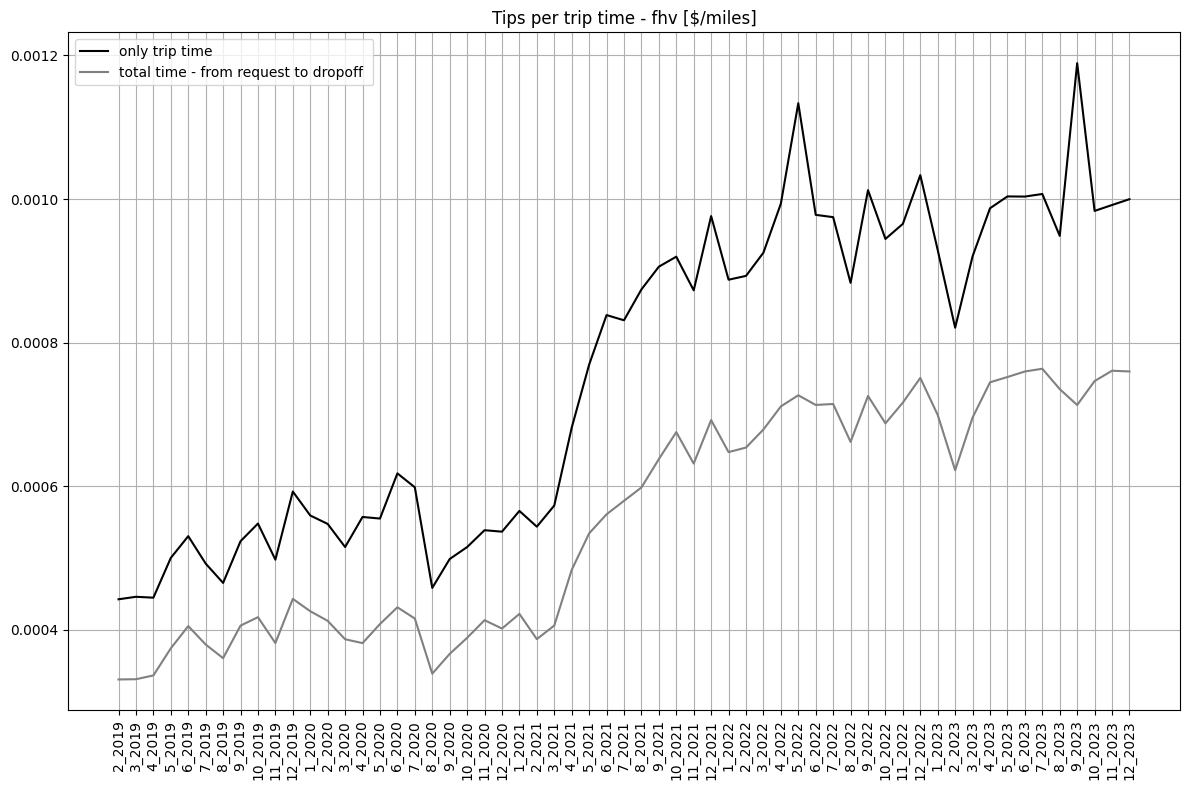

In [194]:
plt.figure(figsize=(12, 8))
plt.plot(fhv_results_df['tips_per_trip_time'], label='only trip time', color='black')
plt.plot(fhv_results_df['tips_per_total_work_time'], label='total time - from request to dropoff ', color='gray')
plt.title('Tips per trip time - fhv [$/miles]')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

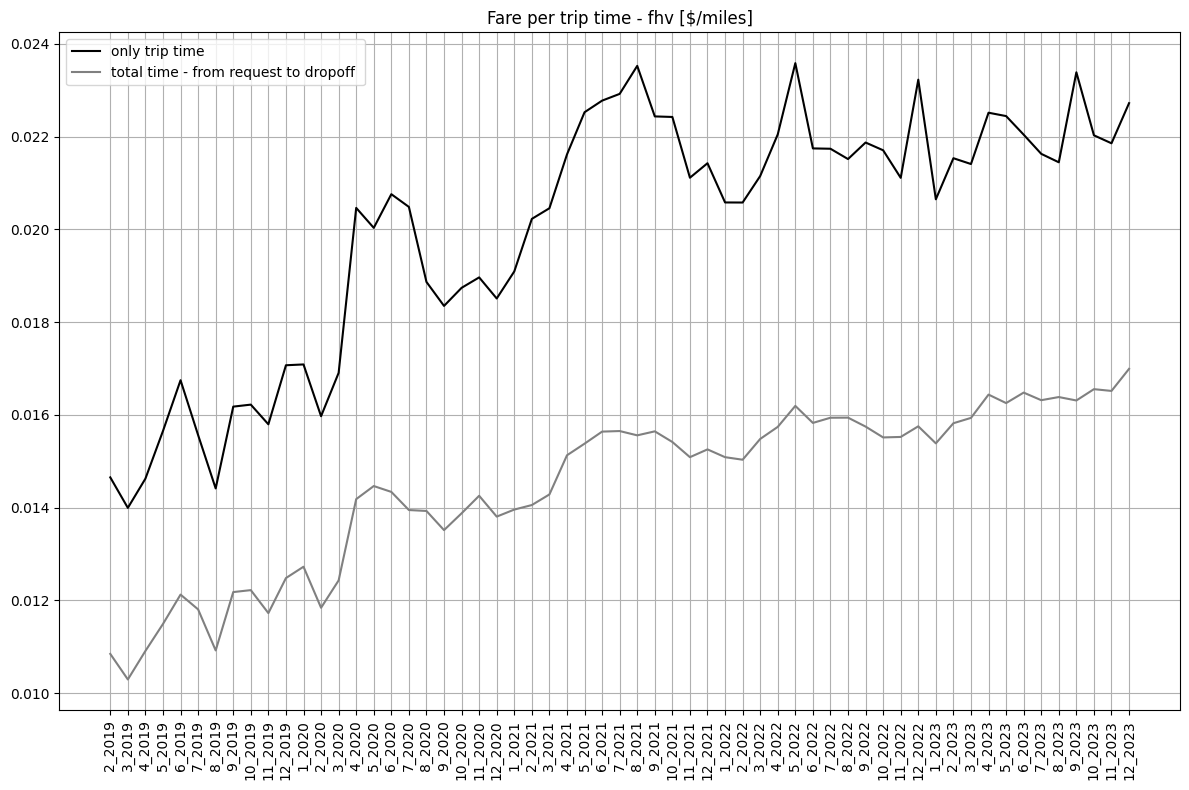

In [195]:
plt.figure(figsize=(12, 8))
plt.plot(fhv_results_df['base_passenger_fare_per_trip_time'], label='only trip time', color='black')
plt.plot(fhv_results_df['base_passenger_fare_per_total_work_time'], label='total time - from request to dropoff ', color='gray')
plt.title('Fare per trip time - fhv [$/miles]')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()